<a href="https://colab.research.google.com/github/Jeremy-Alekai/food-sales-predictions./blob/main/food_sales_predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#load file
filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project 1 - Food Sales prediction/sales_predictions.csv'
df = pd.read_csv(filename)

**DATA CLEANING**

In [4]:
#Display the head of the dataframe.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Knowing the rows and columns of the data
rows_columns = df.shape
rows_columns

(8523, 12)

In [6]:
#what datatypes are there for each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df['Item_Weight'].value_counts().sum()

7060

In [8]:
#are there duplicates?
df.duplicated().sum()

0

In [9]:
# are there any missing values?
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Drop Unnecessary columns

In [10]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**DEALING WITH MISSING VALUES**

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#I've decided to replace the missing rows with the most common weight hence introducing a fraction of an error 
#because I want to preserve the other data in those rows that have missing values. 
# The effect of this wouldn't be that significant as compared to droping the entire row

most_common_ItemWeight = df['Item_Weight'].mode()[0]
df['Item_Weight'].fillna(most_common_ItemWeight,inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
most_common_Outlet_Size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(most_common_Outlet_Size,inplace=True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df=df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**CHECKING FOR INCONSISTENCIES**

In [16]:
df['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
df['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
def Item_Fat_Content_Consistency():
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
  
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
    print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content_Consistency()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [22]:
# Examine the number of unique values in columns
df.nunique()

Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Numerical Statistics Summary**

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.066132,140.992782,1997.831867,2181.288914
std,4.234540,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


**Week 3: Data Visualization**

In [25]:
import matplotlib.pyplot as plt
import numpy as np


**Histogram**

Histogram to view the distributions of various features in your dataset.

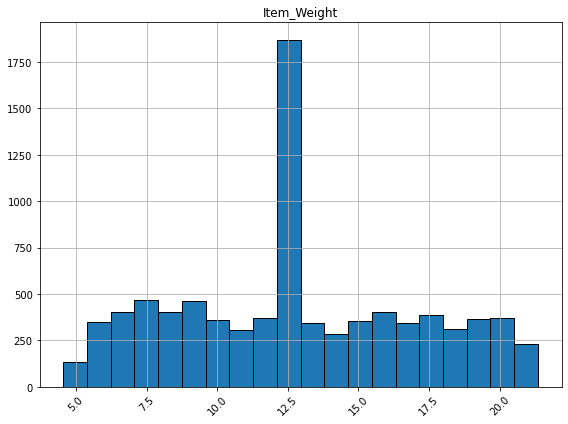

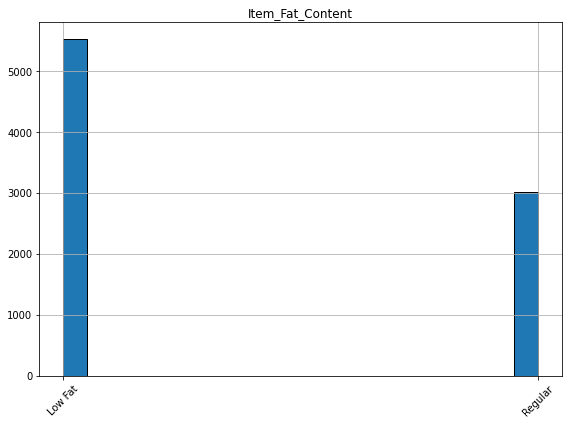

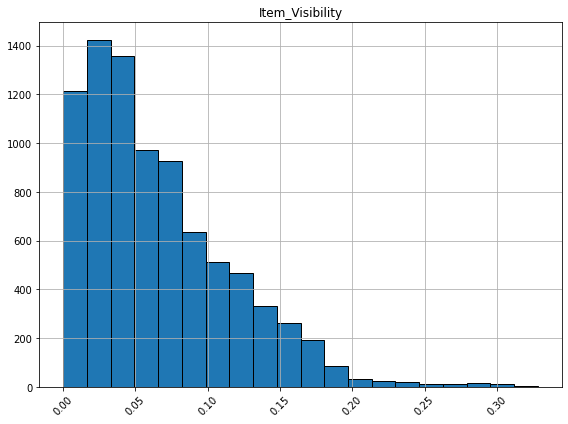

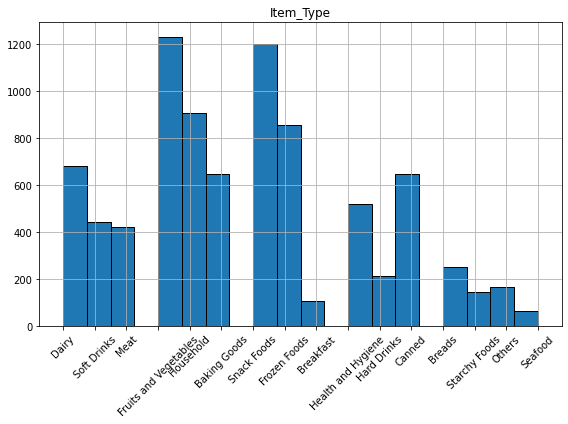

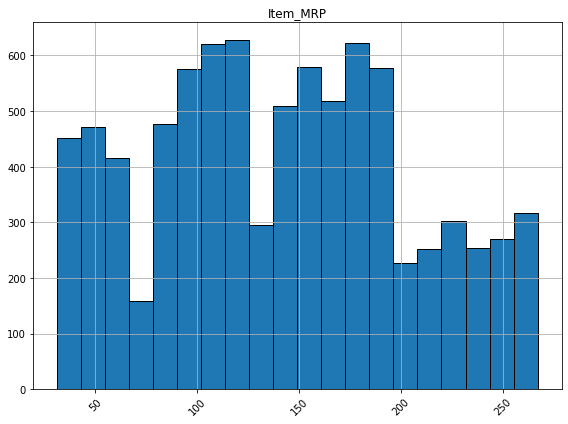

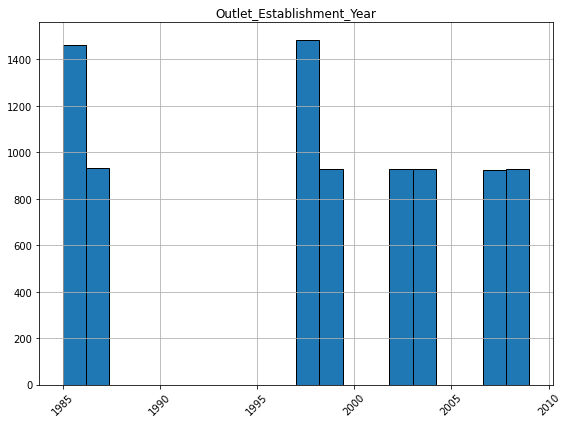

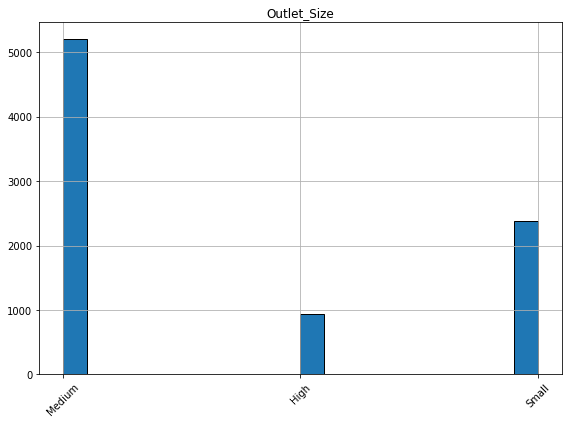

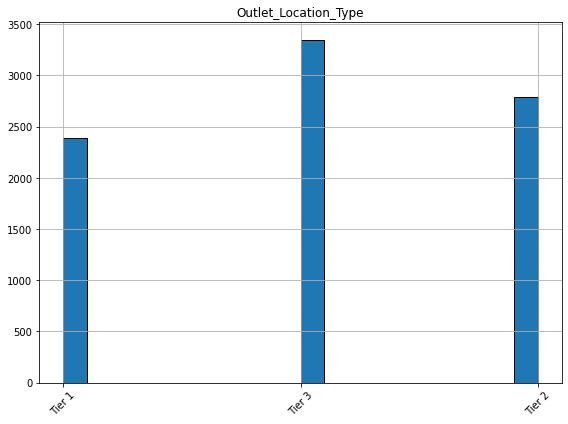

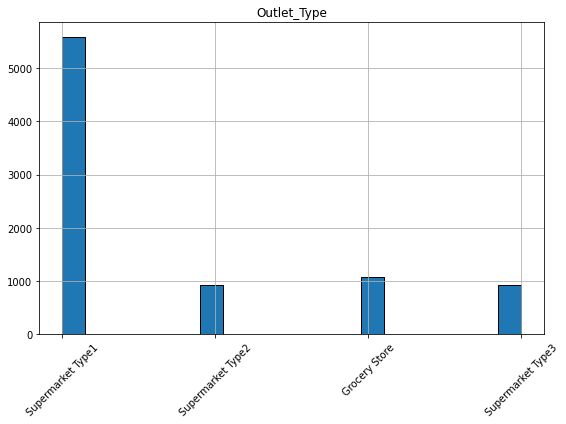

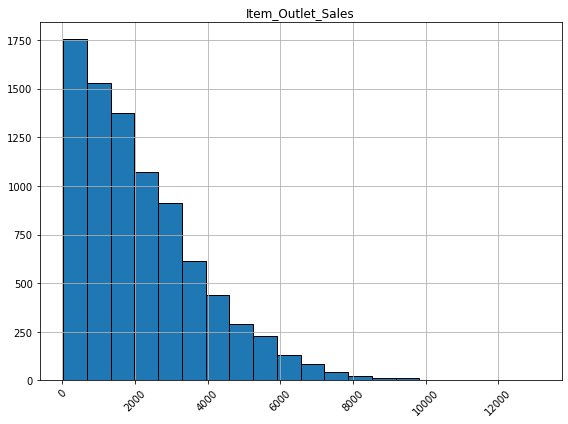

In [26]:
# Create histograms of each feature in the dataset
for column in df.columns:

  # create a grid of subplots with 2 rows and 2 columns
    fig, axes = plt.subplots(figsize=(8, 6))
    df[column].hist(bins=20,edgecolor='black')
    plt.xticks(rotation = 45)
    # plt.ticklabel_format(useOffset=False, style='plain')
    plt.title(column)

    # add some spacing between the subplots
    plt.tight_layout()

    plt.show()

**Boxplot to view statistical summaries of various features in your dataset.**

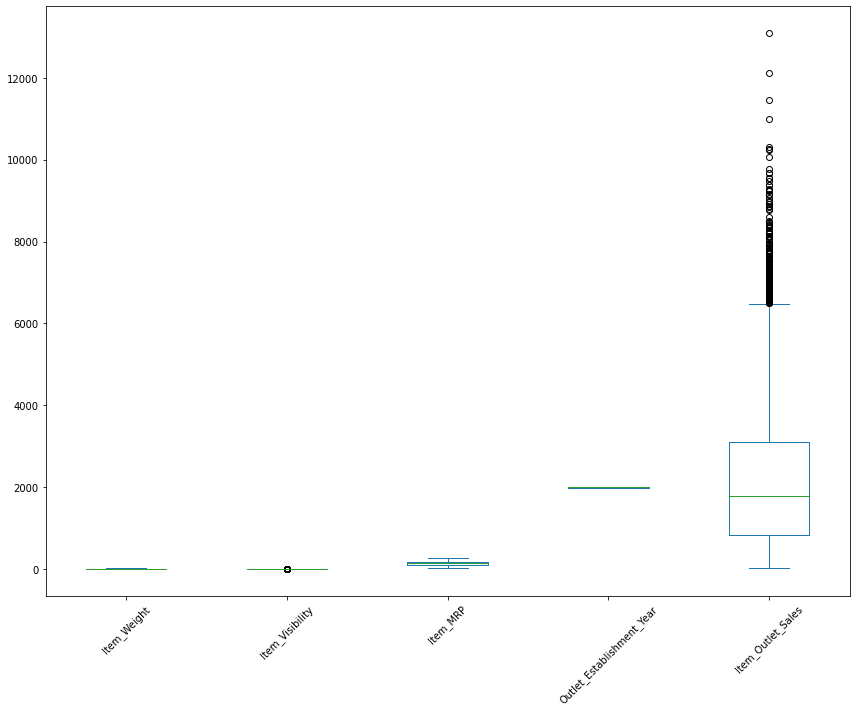

In [27]:

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()
df.plot(kind='box',figsize=(12,10))
plt.xticks(rotation = 45)


plt.tight_layout()

Heatmap of the correlation between features.

In [28]:
import seaborn as sns # used for heatmaps

<AxesSubplot:>

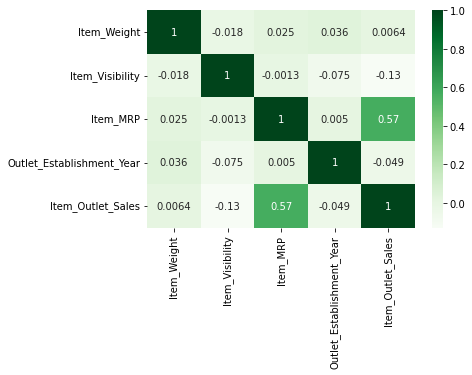

In [29]:
corr= df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

**Week 4**

- Build on your previous cleaning, exploration, and analysis.  
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

**Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).**


**Figure 1**

The following bar chart shows the total sales for each type of outlet. We can see that Supermarket Type1 has the highest sales, followed by Supermarket Type2 and Type3. Grocery stores have the lowest sales. This information can be useful for retailers who want to improve their sales by targeting specific types of outlets.

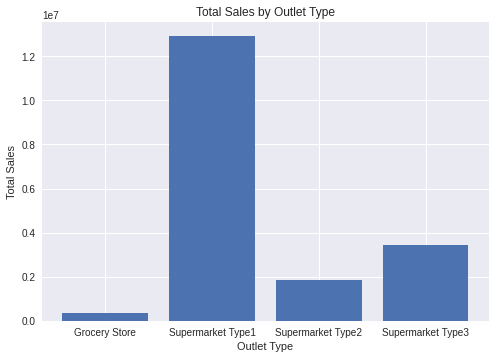

In [75]:

# group the data by Outlet_Type and calculate the total sales
sales_by_outlet = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()

# create a bar chart
plt.bar(sales_by_outlet.index, sales_by_outlet.values)
plt.title("Total Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.show()


**Figure 2**

The histogram shows the distribution of Item_MRP (Maximum Retail Price) and its relationship with Item_Outlet_Sales. We can see that most of the items have an MRP between 50 and 200, and the sales are concentrated in the range of 0-10,000. However, there are some items with high MRPs (> 250) that have very high sales (> 12,000). This suggests that high-priced items can still have a significant impact on sales, but they need to be marketed properly.

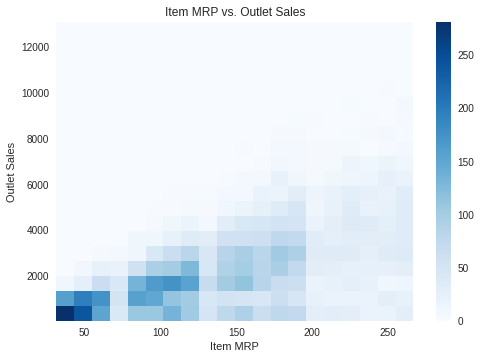

In [70]:
plt.hist2d(df["Item_MRP"], df["Item_Outlet_Sales"], bins=(20, 20), cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Item MRP vs. Outlet Sales")
plt.xlabel("Item MRP")
plt.ylabel("Outlet Sales")
plt.show()

**Figure 3**

We can use this plot to investigate whether there is a correlation between these two variables. The plot shows that there is no clear linear relationship between them, but we can see that there are some outliers where items with higher visibility have lower sales. This may suggest that some items with high visibility may not be attractive to customers, or there may be other factors affecting sales.

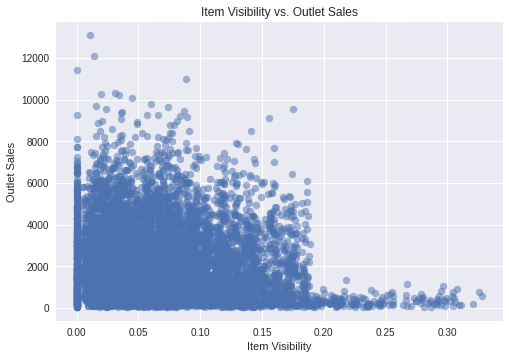

In [71]:
plt.scatter(df["Item_Visibility"], df["Item_Outlet_Sales"], alpha=0.5)
plt.title("Item Visibility vs. Outlet Sales")
plt.xlabel("Item Visibility")
plt.ylabel("Outlet Sales")
plt.show()

**Figure 4**

Another way to visualize the frequency distribution of categorical variables and their relationship with sales is a stacked bar chart. 

The following chart shows the total sales for each combination of Item_Fat_Content and Item_Type. We can see that Low Fat items have higher sales overall than Regular items, and Fruits and Vegetables have the highest sales among all item types. 

However, there are some exceptions where Regular items have higher sales than Low Fat items, such as in the case of Snack Foods and Baking Goods.

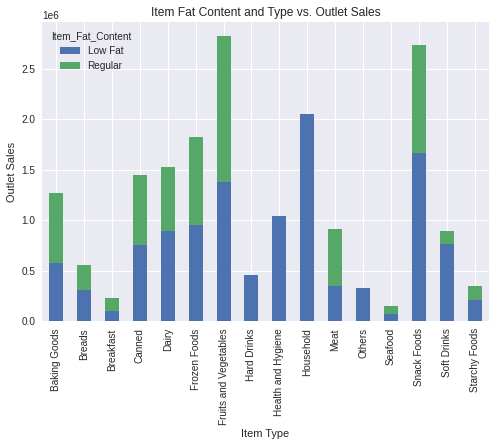

In [72]:
# creating a pivot table to calculate total sales by Item_Fat_Content and Item_Type
pivot_table = df.pivot_table(values="Item_Outlet_Sales", index="Item_Type", columns="Item_Fat_Content", aggfunc="sum")

# create a stacked bar chart
pivot_table.plot(kind="bar", stacked=True)
plt.title("Item Fat Content and Type vs. Outlet Sales")
plt.xlabel("Item Type")
plt.ylabel("Outlet Sales")
plt.show()

**Data Exploration**

Finding out the relationship between the outlet type, Outlet_Establishment_Year and Item_Outlet_Sales

In [33]:
sales_relationship = df.groupby(['Outlet_Type','Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()     
sales_relationship

#      Item_Weight                
#  1   Item_Fat_Content          
#  2   Item_Visibility            
#  3   Item_Type                  
#  4   Item_MRP                   
#  5   Outlet_Establishment_Year   
#  6   Outlet_Size                
#  7   Outlet_Location_Type        
#  8   Outlet_Type                
#  9   Item_Outlet_Sales       

Outlet_Type        Outlet_Establishment_Year
Grocery Store      1985                         368
                   1998                         391
Supermarket Type1  1987                         788
                   1997                         778
                   1999                         785
                   2002                         776
                   2004                         806
                   2007                         777
Supermarket Type2  2009                         779
Supermarket Type3  1985                         827
Name: Item_Outlet_Sales, dtype: int64

In [34]:
Outlet_year_sales = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()     
Outlet_year_sales

Outlet_Establishment_Year
1985    1183
1987     788
1997     778
1998     391
1999     785
2002     776
2004     806
2007     777
2009     779
Name: Item_Outlet_Sales, dtype: int64

In [36]:
#
Established_Years = list(Outlet_year_sales.index)
Established_Years

[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

In [37]:
#
Outlet_sales = list(Outlet_year_sales.values)
Outlet_sales

[1183, 788, 778, 391, 785, 776, 806, 777, 779]

Text(0.5, 1.0, 'Number of sales against the Years of establishment')

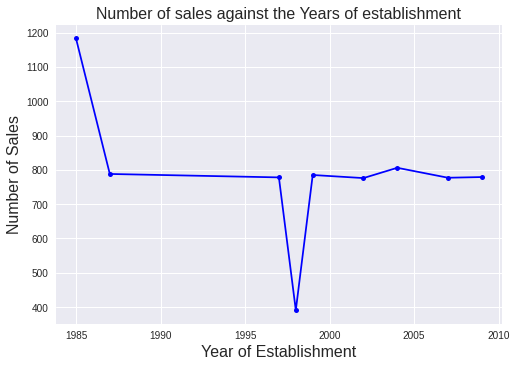

In [49]:
plt.style.use('seaborn')
plt.plot(Established_Years,Outlet_sales, c = 'b', marker = '.', markersize = 10)
plt.xlabel('Year of Establishment', fontsize = 16)
plt.ylabel('Number of Sales', fontsize = 16)
plt.title('Number of sales against the Years of establishment', fontsize = 16)

In [35]:
size_sales_relationship = df.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].nunique()
size_sales_relationship

Outlet_Type        Outlet_Size
Grocery Store      Medium          391
                   Small           368
Supermarket Type1  High            788
                   Medium         1772
                   Small          1370
Supermarket Type2  Medium          779
Supermarket Type3  Medium          827
Name: Item_Outlet_Sales, dtype: int64